In [1]:
#data processing package
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', 200)

In [2]:
#visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#NLP packages
from textblob import TextBlob

import warnings 
warnings.filterwarnings('ignore')

In [4]:
#Testing NLP -Sentiment Analysis using TextBlob
TextBlob("Today is a busy day").sentiment

Sentiment(polarity=0.1, subjectivity=0.3)

In [5]:
#Importing Youtube comments data
comm = pd.read_csv("filter62b504095896e_csv.csv")

In [6]:
comm.head()

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL
0,1,NaN,Connie S,2022-06-10 01:52:16,0,no,no,"Also appreciate further insite into Elon's personal experience with Asperger's, to better understand this spectrum.. Fascinating! Truly a gift as was discussed.. My daughter teaches young children...",UCXLW7WkScTPOMIC-8QxGMLA,UgzfortpGHbOPE4_lvV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzfortpGHbOPE4_lvV4AaABAg
1,2,NaN,Nick Smans,2022-06-10 10:38:40,11,no,no,"What a gift of an interview, by Elon and by Chris. Great questions, topics and respect",UCrgn5Dxih83DrEBeeabCAXQ,UgwFz5ytXBs97JnMyQp4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwFz5ytXBs97JnMyQp4AaABAg
2,3,NaN,Olisa Nwachukwu,2022-06-10 10:49:53,4,no,no,I really wanna known more about Cryptocurrency,UCDGJACdn_J0mVJkbdf9X0vg,UgwnBukF1hdQ2EXtecV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwnBukF1hdQ2EXtecV4AaABAg
3,4,NaN,Olalla Castro,2022-06-10 10:57:26,0,no,no,"It would have been nice for Chris to make some dramatic pauses between lines (at least little pauses!) when Elon was making a huge personal statement or confession. But yeah, great interview!",UC3ToXwMh25bGtuLpQWF1-6A,UgzAp1FI-ZhHbrgnsJx4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzAp1FI-ZhHbrgnsJx4AaABAg
4,5,NaN,Metin Kumarcı,2022-06-10 11:11:39,0,no,no,"DEAR, ELON MUSK.\n\nYOU ARE JUST LUCKY, YOU DO NOT HAVE A PERCENT OF MY INTELLIGENCE.\n\nKNOW THAT YOU ONLY HAVE MONEY DUE TO GOD MAKING YOU LUCKY.\n\nHOWEVER, I WOULD HAVE MADE MY OPPORTUNITIES.\...",UCZ9tgo4V_DaAlYX84yggO8w,UgxUJc9vIaKy26PknJV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgxUJc9vIaKy26PknJV4AaABAg


In [7]:
comm.shape

(100, 11)

In [8]:
import re

In [9]:
#removing punctuations, numbers and special characters.
comm["Comment"] =comm["Comment"].str.replace("[^a-zA-Z#]", " ")

In [10]:
#changing the text to lower case
comm["Comment"] = comm["Comment"].apply(lambda x: x.lower())

In [11]:
#Tokenization
tokenized_comm = comm["Comment"].apply(lambda x: x.split())
tokenized_comm.head()

0    [also, appreciate, further, insite, into, elon, s, personal, experience, with, asperger, s, to, better, understand, this, spectrum, fascinating, truly, a, gift, as, was, discussed, my, daughter, t...
1                                                                                                       [what, a, gift, of, an, interview, by, elon, and, by, chris, great, questions, topics, and, respect]
2                                                                                                                                                     [i, really, wanna, known, more, about, cryptocurrency]
3    [it, would, have, been, nice, for, chris, to, make, some, dramatic, pauses, between, lines, at, least, little, pauses, when, elon, was, making, a, huge, personal, statement, or, confession, but, y...
4    [dear, elon, musk, you, are, just, lucky, you, do, not, have, a, percent, of, my, intelligence, know, that, you, only, have, money, due, to, god, making, you, lucky, however, 

In [14]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
wnl = WordNetLemmatizer()

In [14]:
import nltk
nltk.download('stopwords')
tokenized_comm.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))])
tokenized_comm.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


0    [also, appreciate, further, insite, into, elon, s, personal, experience, with, asperger, s, to, better, understand, this, spectrum, fascinating, truly, a, gift, as, was, discussed, my, daughter, t...
1                                                                                                       [what, a, gift, of, an, interview, by, elon, and, by, chris, great, questions, topics, and, respect]
2                                                                                                                                                     [i, really, wanna, known, more, about, cryptocurrency]
3    [it, would, have, been, nice, for, chris, to, make, some, dramatic, pauses, between, lines, at, least, little, pauses, when, elon, was, making, a, huge, personal, statement, or, confession, but, y...
4    [dear, elon, musk, you, are, just, lucky, you, do, not, have, a, percent, of, my, intelligence, know, that, you, only, have, money, due, to, god, making, you, lucky, however, 

In [15]:
for i in range(len(tokenized_comm)):
    tokenized_comm[i] = ' '.join(tokenized_comm[i])
comm['Comment'] = tokenized_comm

In [16]:
# sentiment analysis
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [17]:
#Setting the sentiment scores
comm['Sentiment Scores'] = comm['Comment'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [18]:
comm.head()

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL,Sentiment Scores
0,1,NaN,Connie S,2022-06-10 01:52:16,0,no,no,also appreciate further insite into elon s personal experience with asperger s to better understand this spectrum fascinating truly a gift as was discussed my daughter teaches young children with ...,UCXLW7WkScTPOMIC-8QxGMLA,UgzfortpGHbOPE4_lvV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzfortpGHbOPE4_lvV4AaABAg,0.9485
1,2,NaN,Nick Smans,2022-06-10 10:38:40,11,no,no,what a gift of an interview by elon and by chris great questions topics and respect,UCrgn5Dxih83DrEBeeabCAXQ,UgwFz5ytXBs97JnMyQp4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwFz5ytXBs97JnMyQp4AaABAg,0.8779
2,3,NaN,Olisa Nwachukwu,2022-06-10 10:49:53,4,no,no,i really wanna known more about cryptocurrency,UCDGJACdn_J0mVJkbdf9X0vg,UgwnBukF1hdQ2EXtecV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwnBukF1hdQ2EXtecV4AaABAg,0.0000
3,4,NaN,Olalla Castro,2022-06-10 10:57:26,0,no,no,it would have been nice for chris to make some dramatic pauses between lines at least little pauses when elon was making a huge personal statement or confession but yeah great interview,UC3ToXwMh25bGtuLpQWF1-6A,UgzAp1FI-ZhHbrgnsJx4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzAp1FI-ZhHbrgnsJx4AaABAg,0.9001
4,5,NaN,Metin Kumarcı,2022-06-10 11:11:39,0,no,no,dear elon musk you are just lucky you do not have a percent of my intelligence know that you only have money due to god making you lucky however i would have made my opportunities i was earning qu...,UCZ9tgo4V_DaAlYX84yggO8w,UgxUJc9vIaKy26PknJV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgxUJc9vIaKy26PknJV4AaABAg,0.9738


In [19]:
#Classifying the sentiment scores as positive, negative and neutral
comm['Sentiment'] = comm['Sentiment Scores'].apply(lambda s: 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))


In [20]:
comm.head(10)

,Unnamed: 0,Unnamed: 1,Name (click to view profile),Date,Likes,isHearted,isPinned,Comment,Profile ID,Comment ID,Comment URL,Sentiment Scores,Sentiment
0,1,NaN,Connie S,2022-06-10 01:52:16,0,no,no,also appreciate further insite into elon s personal experience with asperger s to better understand this spectrum fascinating truly a gift as was discussed my daughter teaches young children with ...,UCXLW7WkScTPOMIC-8QxGMLA,UgzfortpGHbOPE4_lvV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzfortpGHbOPE4_lvV4AaABAg,0.9485,Positive
1,2,NaN,Nick Smans,2022-06-10 10:38:40,11,no,no,what a gift of an interview by elon and by chris great questions topics and respect,UCrgn5Dxih83DrEBeeabCAXQ,UgwFz5ytXBs97JnMyQp4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwFz5ytXBs97JnMyQp4AaABAg,0.8779,Positive
2,3,NaN,Olisa Nwachukwu,2022-06-10 10:49:53,4,no,no,i really wanna known more about cryptocurrency,UCDGJACdn_J0mVJkbdf9X0vg,UgwnBukF1hdQ2EXtecV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgwnBukF1hdQ2EXtecV4AaABAg,0.0000,Neutral
3,4,NaN,Olalla Castro,2022-06-10 10:57:26,0,no,no,it would have been nice for chris to make some dramatic pauses between lines at least little pauses when elon was making a huge personal statement or confession but yeah great interview,UC3ToXwMh25bGtuLpQWF1-6A,UgzAp1FI-ZhHbrgnsJx4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzAp1FI-ZhHbrgnsJx4AaABAg,0.9001,Positive
4,5,NaN,Metin Kumarcı,2022-06-10 11:11:39,0,no,no,dear elon musk you are just lucky you do not have a percent of my intelligence know that you only have money due to god making you lucky however i would have made my opportunities i was earning qu...,UCZ9tgo4V_DaAlYX84yggO8w,UgxUJc9vIaKy26PknJV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgxUJc9vIaKy26PknJV4AaABAg,0.9738,Positive
5,6,NaN,Eivan Orozco,2022-06-10 12:33:13,0,no,no,u hack someone youtube account that is unfair u are hacker am super mad after u did that,UCqkn_Cqu-rHfcYQY-qNi4YQ,UgyEihmLFtSV15aCDOV4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgyEihmLFtSV15aCDOV4AaABAg,-0.3400,Negative
6,7,NaN,Valeria Ismerai Garcia Adame,2022-06-10 13:57:31,2,no,no,elon musk mad and delusional,UCitduEewwv_ZuXtNI3HYxhw,UgzxUgCsgfatM2bqFBF4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzxUgCsgfatM2bqFBF4AaABAg,-0.4939,Negative
7,8,NaN,branden mattos,2022-06-10 14:13:43,0,no,no,so the robots would just have cameras all around it per se cause he said youd be superior with just cameras,UCETT8QyqyKfVSiRhLpE9Ytw,UgxdgSDuiB8-K1vf06B4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgxdgSDuiB8-K1vf06B4AaABAg,0.5423,Positive
8,9,NaN,branden mattos,2022-06-10 14:15:51,0,no,no,whats gonna happen when the bots talk to eachother,UCETT8QyqyKfVSiRhLpE9Ytw,Ugy36hKpWTsbLAMuZWB4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=Ugy36hKpWTsbLAMuZWB4AaABAg,0.0000,Neutral
9,10,NaN,MultiGeorge1978,2022-06-10 21:02:29,0,no,no,elon musk is a profit of our time,UCcqxQczQzRAVeXWJ-N6V4gQ,UgzQ98PLUoxtOWcQmOh4AaABAg,https://www.youtube.com/watch?v=cdZZpaB2kDM&lc=UgzQ98PLUoxtOWcQmOh4AaABAg,0.4404,Positive


In [21]:
comm.Sentiment.value_counts()

Positive    53
Neutral     25
Negative    22
Name: Sentiment, dtype: int64

In [23]:
y=comm['Sentiment'].values
y.shape


(100,)

In [27]:
x=comm['Comment'].values
x.shape

(100,)

In [24]:
import matplotlib.pyplot as plt
plt.style.use(style='seaborn')
%matplotlib inline

In [25]:
#Train-test split
from sklearn.model_selection import train_test_split

In [28]:
#60% for train and 40% for test
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.4)
x_train.shape
y_train.shape
x_test.shape
y_test.shape


(40,)

In [29]:
x_train.shape

(60,)

In [30]:
y_train.shape

(60,)

In [31]:
x_test.shape

(40,)

In [32]:
y_test.shape

(40,)

In [33]:
df1=pd.DataFrame(x_train)
df1=df1.rename(columns={0:'Comments'})

df2=pd.DataFrame(y_train)
df2=df2.rename(columns={0:'sentiment'})
df_train=pd.concat([df1,df2],axis=1)

df_train.head()

,Comments,sentiment
0,zirveda zivre zirva,Neutral
1,when it comes to investing we want our money to grow with the highest rates of return and the lowest risk possible while there are no shortcuts to getting rich but there are smart ways to go about it,Positive
2,amazing,Positive
3,thank you for doing your best for our children can t appreciate you enough for what you already done and continue doing for mother earth and all of us,Positive
4,wow i love him so much he is so pure,Positive


In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comments   60 non-null     object
 1   sentiment  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [35]:
df3=pd.DataFrame(x_test)
df3=df3.rename(columns={0:'Comments'})

df4=pd.DataFrame(y_test)
df4=df2.rename(columns={0:'sentiment'})
df_test=pd.concat([df3,df4],axis=1)

df_test.head()

,Comments,sentiment
0,musk tells us how you blew billion on bitcoin,Neutral
1,listening to the sycophantical seal clapping of the audience was like listening to a bill mahar show obnoxious narcissism,Positive
2,the interviewer needs to shut up so we can hear the interviewee loves his own voice i could not stand the interruptions and implied disrespect and shut it down,Positive
3,elon musk very smart man,Positive
4,i have long since intuited that people on the autism spectrum are advanced souls and quite psychic i am fascinated by how elon s mind works,Positive


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comments   40 non-null     object
 1   sentiment  60 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [37]:
#removing punctuations
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#defining the function to remove punctuation
def remove_punctuation(text):
  if(type(text)==float):
    return text
  ans=""  
  for i in text:     
    if i not in string.punctuation:
      ans+=i    
  return ans

#storing the puntuation free text in a new column called clean_msg
df_train['Comments']= df_train['Comments'].apply(lambda x:remove_punctuation(x))
df_test['Comments']= df_test['Comments'].apply(lambda x:remove_punctuation(x))

In [56]:
df_train.head()
#punctuations are removed from comments column in train dataset

,Comments,sentiment
0,zirveda zivre zirva,Neutral
1,when it comes to investing we want our money to grow with the highest rates of return and the lowest risk possible while there are no shortcuts to getting rich but there are smart ways to go about it,Positive
2,amazing,Positive
3,thank you for doing your best for our children can t appreciate you enough for what you already done and continue doing for mother earth and all of us,Positive
4,wow i love him so much he is so pure,Positive


In [57]:
import nltk
from nltk.corpus import stopwords

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/zhoushimi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [59]:
#method to generate n-grams:
#params:
#text-the text for which we have to generate n-grams
#ngram-number of grams to be generated from the text(1,2,3,4 etc., default value=1)


def generate_N_grams(text,ngram=1):
  words=[word for word in text.split(" ") if word not in set(stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [60]:
#sample
generate_N_grams("I am so happy",2)

Sentence after removing stopwords: ['I', 'happy']


['I happy']

In [61]:
#Create unigrams
from collections import defaultdict

In [62]:
#get the count of every word in both the columns of df_train and df_test dataframes
positiveValues=defaultdict(int)
negativeValues=defaultdict(int)
neutralValues=defaultdict(int)


In [68]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text):
    positiveValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text):
    negativeValues[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text):
    neutralValues[word]+=1

Sentence after removing stopwords: ['comes', 'investing', 'want', 'money', 'grow', 'highest', 'rates', 'return', 'lowest', 'risk', 'possible', 'shortcuts', 'getting', 'rich', 'smart', 'ways', 'go']
Sentence after removing stopwords: ['amazing']
Sentence after removing stopwords: ['thank', 'best', 'children', 'appreciate', 'enough', 'already', 'done', 'continue', 'mother', 'earth', 'us']
Sentence after removing stopwords: ['wow', 'love', 'much', 'pure']
Sentence after removing stopwords: ['want', 'know', 'elon', 'musk', 'reduce', 'time', 'reach', 'mars']
Sentence after removing stopwords: ['amazing', 'interview']
Sentence after removing stopwords: ['appreciate', 'person', 'wants', 'share', 'experience', 'thanks', 'sharing']
Sentence after removing stopwords: ['amazing', 'times', 'ahead', 'thank', 'elon', 'making', 'future', 'exciting']
Sentence after removing stopwords: ['also', 'appreciate', 'insite', 'elon', 'personal', 'experience', 'asperger', 'better', 'understand', 'spectrum', 'fa

In [69]:
positiveValues
#output is a dictionary-list of words in news column and the count of each of these words in train dataset where sentiment=positive

defaultdict(int,
            {'comes': 4,
             'investing': 4,
             'want': 8,
             'money': 5,
             'grow': 4,
             'highest': 4,
             'rates': 4,
             'return': 4,
             'lowest': 4,
             'risk': 4,
             'possible': 4,
             'shortcuts': 4,
             'getting': 4,
             'rich': 4,
             'smart': 4,
             'ways': 6,
             'go': 5,
             'amazing': 3,
             'thank': 3,
             'best': 2,
             'children': 4,
             'appreciate': 3,
             'enough': 1,
             'already': 1,
             'done': 2,
             'continue': 1,
             'mother': 2,
             'earth': 2,
             'us': 1,
             'wow': 3,
             'love': 6,
             'much': 2,
             'pure': 1,
             'know': 3,
             'elon': 20,
             'musk': 9,
             'reduce': 1,
             'time': 6,
             'reach

In [70]:
positiveValues.items()
#o/p is a dictionary with the word in comments column as key and its count within the train dataset as its corresponding value

dict_items([('comes', 4), ('investing', 4), ('want', 8), ('money', 5), ('grow', 4), ('highest', 4), ('rates', 4), ('return', 4), ('lowest', 4), ('risk', 4), ('possible', 4), ('shortcuts', 4), ('getting', 4), ('rich', 4), ('smart', 4), ('ways', 6), ('go', 5), ('amazing', 3), ('thank', 3), ('best', 2), ('children', 4), ('appreciate', 3), ('enough', 1), ('already', 1), ('done', 2), ('continue', 1), ('mother', 2), ('earth', 2), ('us', 1), ('wow', 3), ('love', 6), ('much', 2), ('pure', 1), ('know', 3), ('elon', 20), ('musk', 9), ('reduce', 1), ('time', 6), ('reach', 1), ('mars', 1), ('interview', 2), ('person', 1), ('wants', 1), ('share', 1), ('experience', 2), ('thanks', 1), ('sharing', 1), ('times', 2), ('ahead', 1), ('making', 4), ('future', 6), ('exciting', 1), ('also', 4), ('insite', 1), ('personal', 2), ('asperger', 1), ('better', 5), ('understand', 3), ('spectrum', 1), ('fascinating', 1), ('truly', 4), ('gift', 2), ('discussed', 1), ('daughter', 1), ('teaches', 1), ('young', 1), ('au

In [71]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive=pd.DataFrame(sorted(positiveValues.items(),key=lambda x:x[1],reverse=True))
df_negative=pd.DataFrame(sorted(negativeValues.items(),key=lambda x:x[1],reverse=True))
df_neutral=pd.DataFrame(sorted(neutralValues.items(),key=lambda x:x[1],reverse=True))

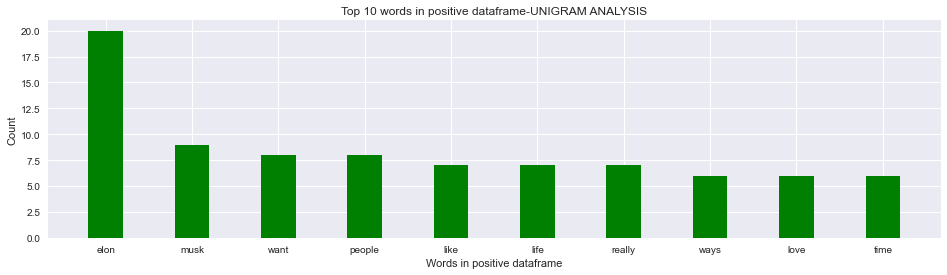

In [72]:
pd1=df_positive[0][:10]
pd2=df_positive[1][:10]

ned1=df_negative[0][:10]
ned2=df_negative[1][:10]

nud1=df_neutral[0][:10]
nud2=df_neutral[1][:10]


plt.figure(1,figsize=(16,4))

plt.bar(pd1,pd2, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-UNIGRAM ANALYSIS")

plt.savefig("positive-unigram.png")
plt.show()


In [73]:
df_positive.head(10)

,0,1
0,elon,20
1,musk,9
2,want,8
3,people,8
4,like,7
5,life,7
6,really,7
7,ways,6
8,love,6
9,time,6


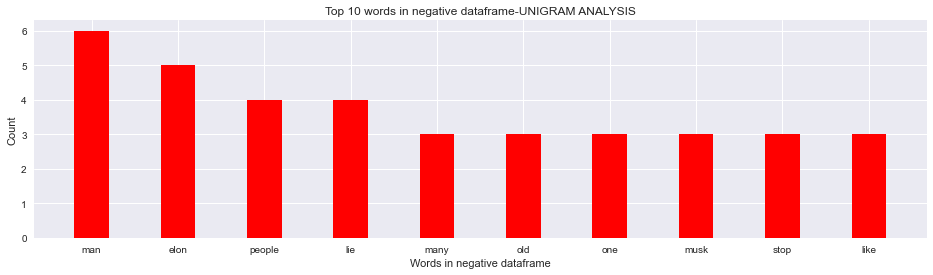

In [74]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1,ned2, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-UNIGRAM ANALYSIS")

plt.savefig("negative-unigram.png")
plt.show()

In [75]:
df_negative.head(10)

,0,1
0,man,6
1,elon,5
2,people,4
3,lie,4
4,many,3
5,old,3
6,one,3
7,musk,3
8,stop,3
9,like,3


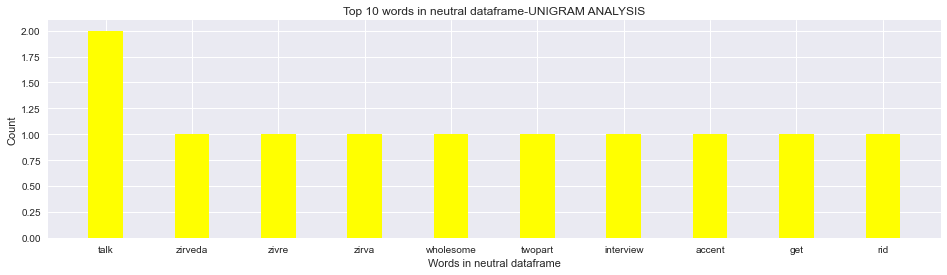

In [76]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1,nud2, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-UNIGRAM ANALYSIS")

plt.savefig("neutral-unigram.png")
plt.show()

In [77]:
df_neutral.head(10)

,0,1
0,talk,2
1,zirveda,1
2,zivre,1
3,zirva,1
4,wholesome,1
5,twopart,1
6,interview,1
7,accent,1
8,get,1
9,rid,1


In [78]:
#Creating bigrams
positiveValues2=defaultdict(int)
negativeValues2=defaultdict(int)
neutralValues2=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [80]:
#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text,2):
    positiveValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text,2):
    negativeValues2[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text,2):
    neutralValues2[word]+=1

Sentence after removing stopwords: ['comes', 'investing', 'want', 'money', 'grow', 'highest', 'rates', 'return', 'lowest', 'risk', 'possible', 'shortcuts', 'getting', 'rich', 'smart', 'ways', 'go']
Sentence after removing stopwords: ['amazing']
Sentence after removing stopwords: ['thank', 'best', 'children', 'appreciate', 'enough', 'already', 'done', 'continue', 'mother', 'earth', 'us']
Sentence after removing stopwords: ['wow', 'love', 'much', 'pure']
Sentence after removing stopwords: ['want', 'know', 'elon', 'musk', 'reduce', 'time', 'reach', 'mars']
Sentence after removing stopwords: ['amazing', 'interview']
Sentence after removing stopwords: ['appreciate', 'person', 'wants', 'share', 'experience', 'thanks', 'sharing']
Sentence after removing stopwords: ['amazing', 'times', 'ahead', 'thank', 'elon', 'making', 'future', 'exciting']
Sentence after removing stopwords: ['also', 'appreciate', 'insite', 'elon', 'personal', 'experience', 'asperger', 'better', 'understand', 'spectrum', 'fa

In [81]:

#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive2=pd.DataFrame(sorted(positiveValues2.items(),key=lambda x:x[1],reverse=True))
df_negative2=pd.DataFrame(sorted(negativeValues2.items(),key=lambda x:x[1],reverse=True))
df_neutral2=pd.DataFrame(sorted(neutralValues2.items(),key=lambda x:x[1],reverse=True))

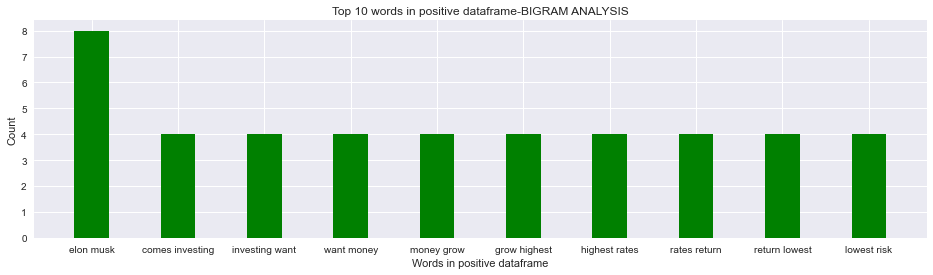

In [82]:
pd1bi=df_positive2[0][:10]
pd2bi=df_positive2[1][:10]

ned1bi=df_negative2[0][:10]
ned2bi=df_negative2[1][:10]

nud1bi=df_neutral2[0][:10]
nud2bi=df_neutral2[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1bi,pd2bi, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-BIGRAM ANALYSIS")

plt.savefig("positive-bigram.png")
plt.show()

In [83]:
df_positive2.head(10)

,0,1
0,elon musk,8
1,comes investing,4
2,investing want,4
3,want money,4
4,money grow,4
5,grow highest,4
6,highest rates,4
7,rates return,4
8,return lowest,4
9,lowest risk,4


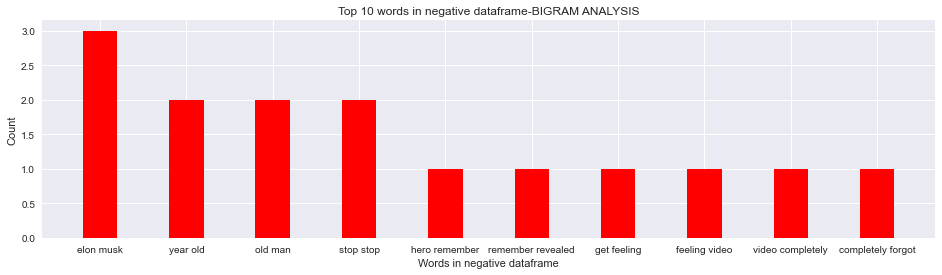

In [84]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1bi,ned2bi, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-BIGRAM ANALYSIS")

plt.savefig("negative-bigram.png")
plt.show()

In [85]:
df_negative2.head(10)

,0,1
0,elon musk,3
1,year old,2
2,old man,2
3,stop stop,2
4,hero remember,1
5,remember revealed,1
6,get feeling,1
7,feeling video,1
8,video completely,1
9,completely forgot,1


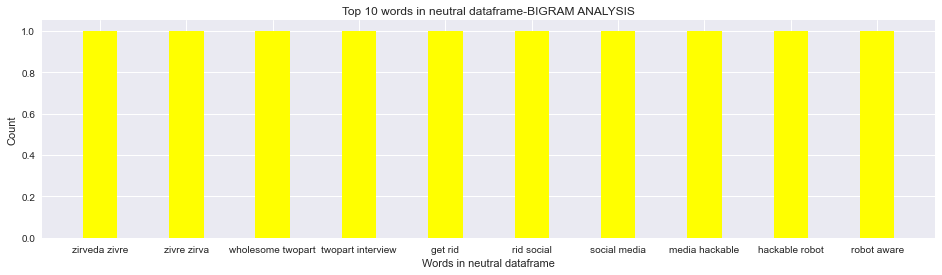

In [86]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1bi,nud2bi, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-BIGRAM ANALYSIS")

plt.savefig("neutral-bigram.png")
plt.show()

In [87]:
df_neutral2.head(10)

,0,1
0,zirveda zivre,1
1,zivre zirva,1
2,wholesome twopart,1
3,twopart interview,1
4,get rid,1
5,rid social,1
6,social media,1
7,media hackable,1
8,hackable robot,1
9,robot aware,1


In [89]:
#Creating trigrams
positiveValues3=defaultdict(int)
negativeValues3=defaultdict(int)
neutralValues3=defaultdict(int)
#get the count of every word in both the columns of df_train and df_test dataframes

In [90]:

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="positive"
for text in df_train[df_train.sentiment=="Positive"].Comments:
  for word in generate_N_grams(text,3):
    positiveValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="negative"
for text in df_train[df_train.sentiment=="Negative"].Comments:
  for word in generate_N_grams(text,3):
    negativeValues3[word]+=1

#get the count of every word in both the columns of df_train and df_test dataframes where sentiment="neutral"
for text in df_train[df_train.sentiment=="Neutral"].Comments:
  for word in generate_N_grams(text,3):
    neutralValues3[word]+=1

Sentence after removing stopwords: ['comes', 'investing', 'want', 'money', 'grow', 'highest', 'rates', 'return', 'lowest', 'risk', 'possible', 'shortcuts', 'getting', 'rich', 'smart', 'ways', 'go']
Sentence after removing stopwords: ['amazing']
Sentence after removing stopwords: ['thank', 'best', 'children', 'appreciate', 'enough', 'already', 'done', 'continue', 'mother', 'earth', 'us']
Sentence after removing stopwords: ['wow', 'love', 'much', 'pure']
Sentence after removing stopwords: ['want', 'know', 'elon', 'musk', 'reduce', 'time', 'reach', 'mars']
Sentence after removing stopwords: ['amazing', 'interview']
Sentence after removing stopwords: ['appreciate', 'person', 'wants', 'share', 'experience', 'thanks', 'sharing']
Sentence after removing stopwords: ['amazing', 'times', 'ahead', 'thank', 'elon', 'making', 'future', 'exciting']
Sentence after removing stopwords: ['also', 'appreciate', 'insite', 'elon', 'personal', 'experience', 'asperger', 'better', 'understand', 'spectrum', 'fa

Sentence after removing stopwords: ['te', 'veel', 'elon', 'mieren', 'zijn', 'nu', 'nog', 'vele', 'slimmer', 'man']
Sentence after removing stopwords: ['robomatics', 'robotech', 'envincible']
Sentence after removing stopwords: ['er', 'al', 'systeem']
Sentence after removing stopwords: ['presenter', 'talk', 'really', 'similar', 'way', 'musk']
Sentence after removing stopwords: ['gv']
Sentence after removing stopwords: ['dinya', 'zivronaka', 'xwaka', 'gokeya']
Sentence after removing stopwords: ['waisted', 'enlonmask', 'time']


In [91]:
#focus on more frequently occuring words for every sentiment=>
#sort in DO wrt 2nd column in each of positiveValues,negativeValues and neutralValues

df_positive3=pd.DataFrame(sorted(positiveValues3.items(),key=lambda x:x[1],reverse=True))
df_negative3=pd.DataFrame(sorted(negativeValues3.items(),key=lambda x:x[1],reverse=True))
df_neutral3=pd.DataFrame(sorted(neutralValues3.items(),key=lambda x:x[1],reverse=True))

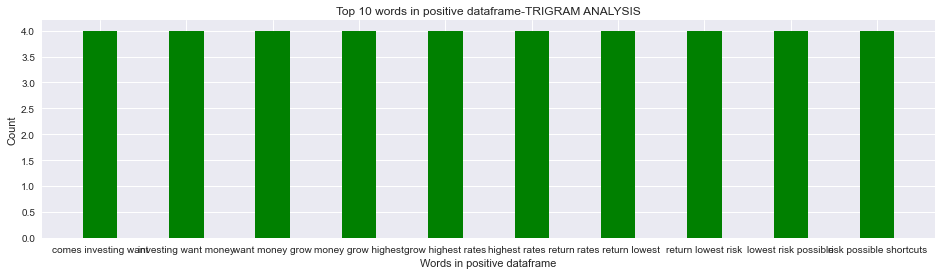

In [92]:
pd1tri=df_positive3[0][:10]
pd2tri=df_positive3[1][:10]

ned1tri=df_negative3[0][:10]
ned2tri=df_negative3[1][:10]

nud1tri=df_neutral3[0][:10]
nud2tri=df_neutral3[1][:10]

plt.figure(1,figsize=(16,4))

plt.bar(pd1tri,pd2tri, color ='green',
        width = 0.4)
 
plt.xlabel("Words in positive dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in positive dataframe-TRIGRAM ANALYSIS")

plt.savefig("positive-trigram.png")
plt.show()

In [93]:

df_positive3.head(10)

,0,1
0,comes investing want,4
1,investing want money,4
2,want money grow,4
3,money grow highest,4
4,grow highest rates,4
5,highest rates return,4
6,rates return lowest,4
7,return lowest risk,4
8,lowest risk possible,4
9,risk possible shortcuts,4


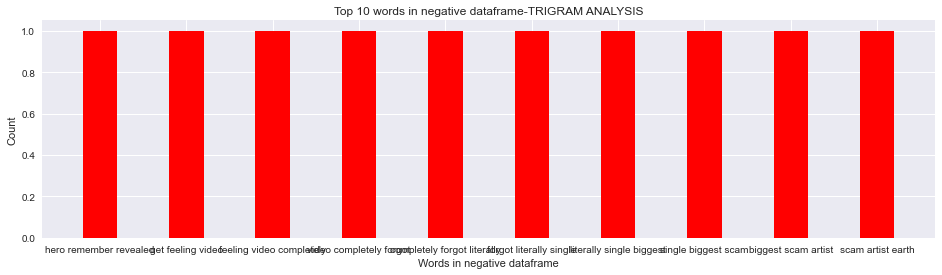

In [94]:
plt.figure(1,figsize=(16,4))

plt.bar(ned1tri,ned2tri, color ='red',
        width = 0.4)
 
plt.xlabel("Words in negative dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in negative dataframe-TRIGRAM ANALYSIS")

plt.savefig("negative-trigram.png")
plt.show()

In [95]:
df_negative3.head(10)

,0,1
0,hero remember revealed,1
1,get feeling video,1
2,feeling video completely,1
3,video completely forgot,1
4,completely forgot literally,1
5,forgot literally single,1
6,literally single biggest,1
7,single biggest scam,1
8,biggest scam artist,1
9,scam artist earth,1


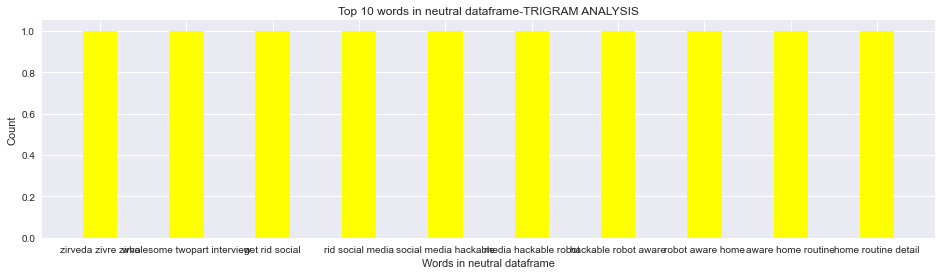

In [96]:
plt.figure(1,figsize=(16,4))

plt.bar(nud1tri,nud2tri, color ='yellow',
        width = 0.4)
 
plt.xlabel("Words in neutral dataframe")
plt.ylabel("Count")
plt.title("Top 10 words in neutral dataframe-TRIGRAM ANALYSIS")

plt.savefig("neutral-trigram.png")
plt.show()

In [97]:
df_neutral3.head(10)

,0,1
0,zirveda zivre zirva,1
1,wholesome twopart interview,1
2,get rid social,1
3,rid social media,1
4,social media hackable,1
5,media hackable robot,1
6,hackable robot aware,1
7,robot aware home,1
8,aware home routine,1
9,home routine detail,1
